<a href="https://colab.research.google.com/github/Gayathri-Patibandla/FML/blob/main/Multivariate_L2_on_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

Reading the dataset

In [2]:
startup = pd.read_csv("/content/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


performing EDA

In [3]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Here State is a String.we need to convert them.

In [5]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startup.duplicated().sum()

0

Conversion of Strings to integers 

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
startup.State = le.fit_transform(startup.State)

In [9]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


Strings are converted into integers.

In [10]:
startup.shape

(50, 5)

Finding the correlation between the input features and target variable

In [11]:
sc=startup.corr()
sc

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


Plotting a Heatmap

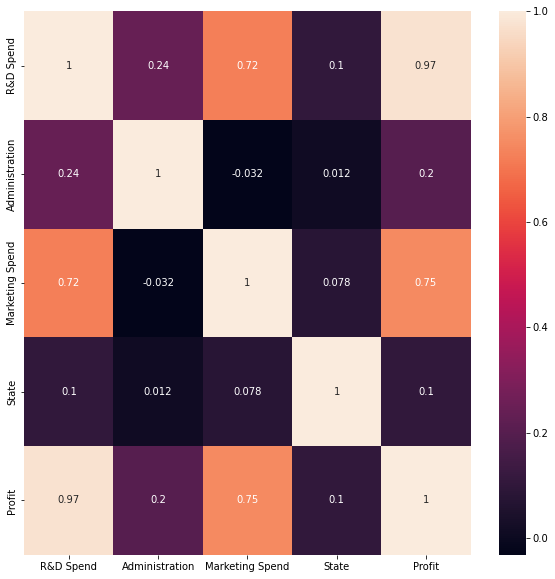

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(sc, annot=True)
plt.show()

In [13]:
X = startup.drop('Profit', axis=1).values
y = startup['Profit'].values

splitting the training data and test data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [15]:
X_train.shape, X_test.shape

((37, 4), (13, 4))

Training the model

In [16]:
reg = Ridge(alpha=0.1)
reg.fit(X_train, y_train)

Ridge(alpha=0.1)

Evaluating the model

ON TRAINING DATA

In [17]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 5729.936502144213
MSE = 53730536.94743699
RMSE = 7330.1116599569605
R_2 = 0.9640046507493456


ON TESTING DATA

In [18]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1 = reg.predict(X_test)
print(f'MAE = {mean_absolute_error(y_test, y_pred1)}')
print(f'MSE = {mean_squared_error(y_test, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred1))}')
print(f'R_2 = {r2_score(y_test, y_pred1)}')

MAE = 8814.862846842398
MSE = 164146966.6421239
RMSE = 12811.985273255816
R_2 = 0.9070264867631033
